<a href="https://colab.research.google.com/github/tx-seigi-nozaki/ai-training/blob/main/AI%E5%9F%BA%E7%A4%8E%E5%AD%A6%E7%BF%92_5_%E7%AC%AC4%E7%AB%A0%EF%BC%88%E5%BE%8C%E5%8D%8A%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AWS学習会第4ターム
# AI基礎学習① 第5回 4章前半までの振り返り

## 3章サマリー

*   ディープラーニングの学習の仕組み（全結合）
*   畳み込みニューらりネットワーク
*   リカレントニューラルネットワーク






## 4章前半サマリー


*   画像認識
*   自然言語処理
    *   Attentionとトランスフォーマー





# AI基礎学習① 第5回 4章（後半）

|  分野  |  章・節  |  項目  |  メモ  |
|  :---  |  :---:  |  :---  |  :---   |
|  画像認識の進歩、一般物体認識  |  4.1  | 一般物体認識 | ＊＊＊＊＊ | 
|  画像認識の進歩、一般物体認識  |  4.2  | 物体検出の具体的な手法 | ＊＊＊＊＊ | 
|  画像認識の進歩、一般物体認識  |  4.3  | セグメンテーションを用いた物体認識 | ＊＊＊＊ | 
|  自然言語処理  |  4.4  | 自然言語処理 | 
|  自然言語処理  |  4.5  | 単語の数値化の手法 | 
|  自然言語処理  |  4.6  | トピックモデル | 
|  自然言語処理  |  4.7  | 自然言語モデルの発展 | 
|  自然言語処理  |  4.8  | ニューラル機械翻訳 | 
|  自然言語処理  |  4.9  | Attentionとトランスフォーマー |RNN,CNN手法を用いない新たな手法  | 
|  自然言語処理  |  4.10  | BERT | Attention層で構成 | 
|  自然言語処理  |  4.11  | GPT-nモデル | 画像生成、文章生成の最新技術 | 
|  自然言語処理  |  4.12  | マルチタスク言語モデル | ＊＊＊＊ | 
|  音声認識・音声合成  |  4.13  |  音声処理  | ＊＊＊＊ |
|  強化学習のアルゴリズムの進展  |  4.14  |  深層強化学習のアルゴリズムの発展  | ＊＊＊＊|
|  ロボティックス  |  4.15  |  強化学習とロボティックス  |  |
|  マルチモーダルAI  |  4.16  |  マルチモーダル技術  | IBC2022展示なども |
|  （説明できるAI）  |  4.17  |  モデルの解釈性とその対応  | NEC事例、AI戦2022　など |


# 4.10 BERT



## 1) BERTの概要


> 4.9節トランスフォーマーのエンコーダで双方向の情報を同時に使用

> 2018年後半にGoogleが発表。自然言語処理の新しいディープラーニングモデル（Google検索）

> 大量のデータを用いた**事前学習モデル**を利用し、手元の限られた数のデータでも高精度な認識性能を達成(**ファインチューニング**)
> それまでの自然言語処理に比べ、高い汎用性

> 文脈を読むことが可能になった。これにより、翻訳、感情分析、文書分類など可能に



















## 2) BERTの仕組み

事前学習（Pre-training）と、用意したデータの学習（Fine-Tuning）で汎用モデルを利用し少ないデータでも精度の高い結果を得る

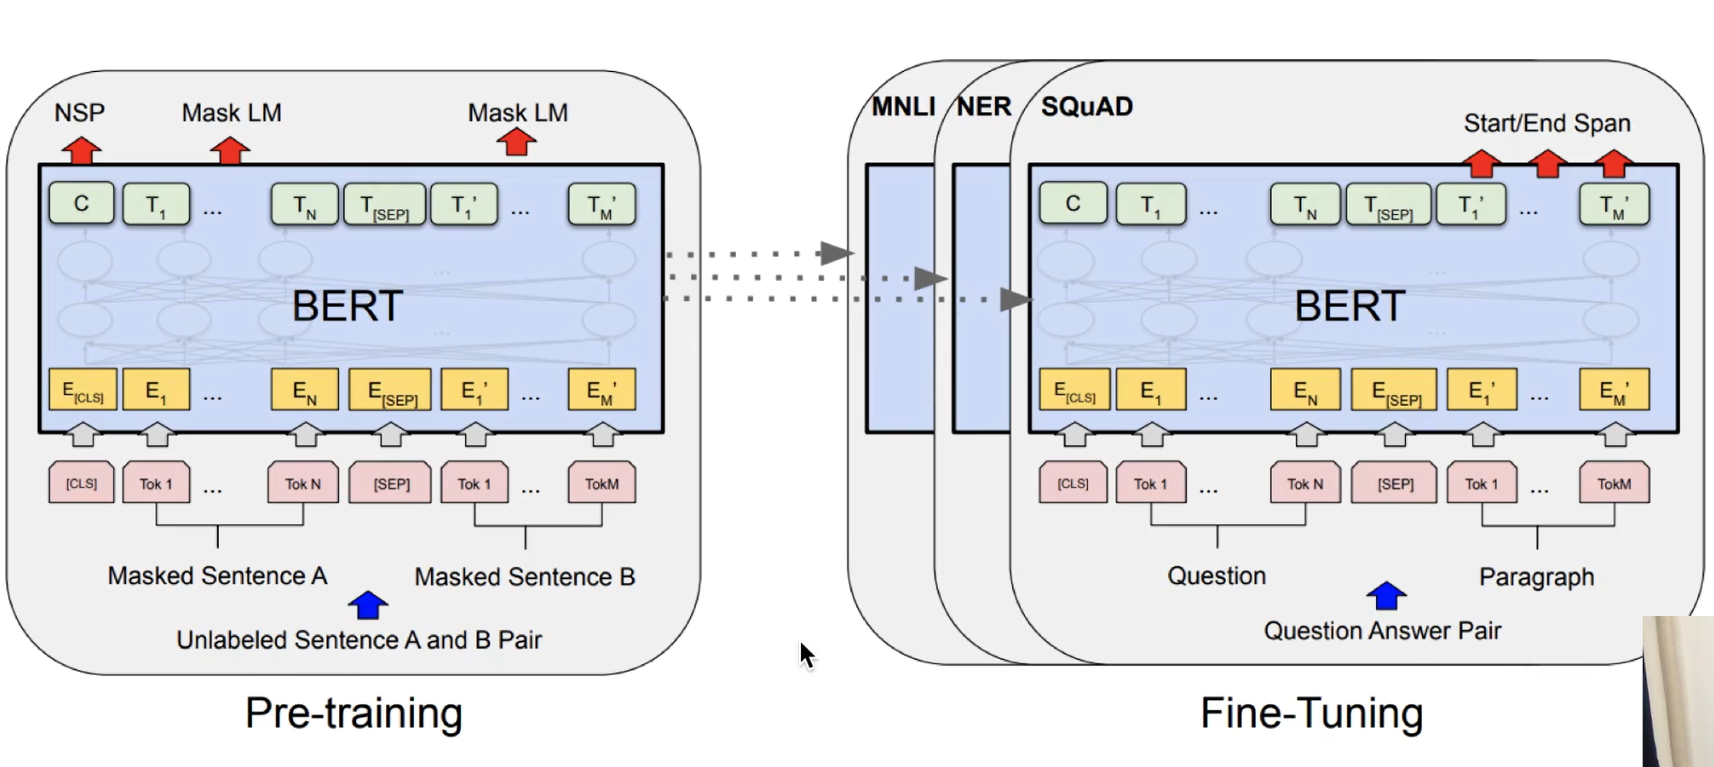

## 3)  BERTデモ

###Pytorchのインストールを確認

In [ ]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu113


### PyTorchの基礎
PyTorchの基礎を学ぶために、ニューラルネットワークを訓練して手書き文字の認識を行います。 


### データの読み込み
`torchvision.datasets`を使って手書き文字のデータを読み込み、**DataLoader**を設定します。  
DataLoaderを使うと、データの読み込みやミニバッチ法の実装などが大幅に楽になります。   
`torchvision.datasets`にはMNISTの他にも様々なデータセットが用意されています。  
https://pytorch.org/docs/stable/torchvision/datasets.html

## MINISTデータ
　The MNIST database（Modified National Institute of Standards and Technology database）（以下、MNIST）は、「0」～「9」の手書き数字の画像データセット
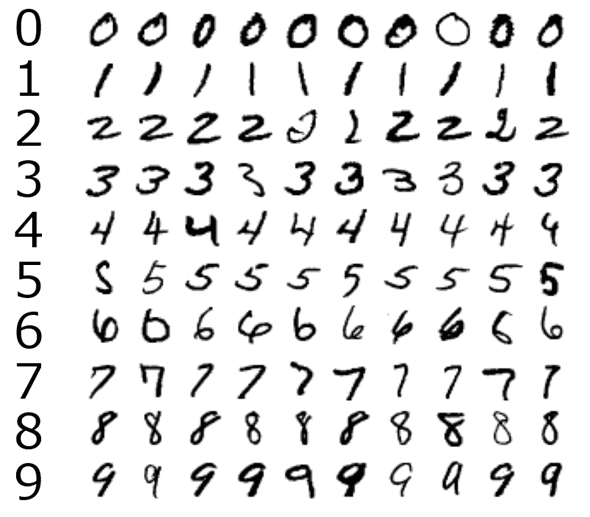

MNISTに含まれる画像データの内容
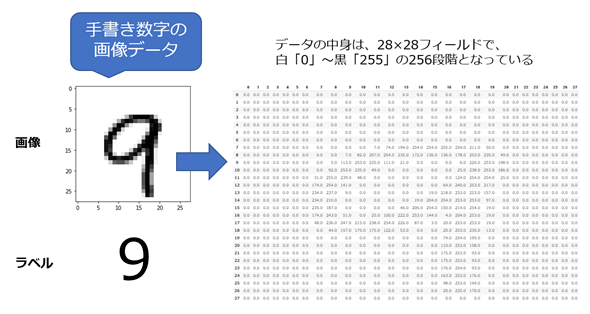

In [ ]:
import torch
from torchvision.datasets import MNIST  # 手書き文字画像のデータ
from torchvision import transforms
from torch.utils.data import DataLoader

# 訓練データを取得
mnist_train = MNIST("./data", 
                    train=True, download=True,
                    transform=transforms.ToTensor())
# テストデータの取得
mnist_test = MNIST("./data",
                   train=False, download=True,
                   transform=transforms.ToTensor())
print("訓練データの数:", len(mnist_train), "テストデータの数:", len(mnist_test))

# DataLoaderの設定
img_size = 28
batch_size = 256
train_loader = DataLoader(mnist_train, 
                          batch_size=batch_size,
                          shuffle=True)
test_loader = DataLoader(mnist_test,
                         batch_size=batch_size,
                         shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

訓練データの数: 60000 テストデータの数: 10000


手書き文字の画像サイズは、28×28になります。  

### モデルの構築
今回は、`nn.Module`モジュールを継承したクラスとして、モデルを構築します。  
`.cuda()`により、モデルの計算はGPU上で行われるようになります。  

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(img_size*img_size, 1024)  # 全結合層
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 10)

    def forward(self, x):
        x = x.view(-1, img_size*img_size)  # バッチサイズ×入力の数
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
net.cuda()  # GPU対応
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
)


### 学習（モデルの訓練）
DataLoaderを使い、ミニバッチを取り出して訓練および評価を行います。  

1エポックの中で何度もミニバッチを使って訓練が行われるので、ミニバッチ法が実装されていることになります。  
学習には時間がかかりますので、編集→ノートブックの設定のハードウェアアクセラレーターにGPUが選択されていることを確認しましょう。

In [ ]:
from torch import optim

# 交差エントロピー誤差関数
loss_fnc = nn.CrossEntropyLoss()

# SGD
optimizer = optim.SGD(net.parameters(), lr=0.01)

# 損失のログ
record_loss_train = []
record_loss_test = []

# 学習
for i in range(20):  # 20エポック学習
    net.train()  # 訓練モード
    loss_train = 0
    for j, (x, t) in enumerate(train_loader):  # ミニバッチ（x, t）を取り出す
        x, t = x.cuda(), t.cuda()  # GPU対応
        y = net(x)
        loss = loss_fnc(y, t)
        loss_train += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_train /= j+1
    record_loss_train.append(loss_train)

    net.eval()  # 評価モード
    loss_test = 0
    for j, (x, t) in enumerate(test_loader):  # ミニバッチ（x, t）を取り出す
        x, t = x.cuda(), t.cuda()
        y = net(x)
        loss = loss_fnc(y, t)
        loss_test += loss.item()
    loss_test /= j+1
    record_loss_test.append(loss_test)

    if i%1 == 0:
        print("Epoch:", i, "Loss_Train:", loss_train, "Loss_Test:", loss_test)

Epoch: 0 Loss_Train: 2.218016921712997 Loss_Test: 2.0914967000484466
Epoch: 1 Loss_Train: 1.8261305788730053 Loss_Test: 1.4459428817033768
Epoch: 2 Loss_Train: 1.130335284293966 Loss_Test: 0.8499322444200516
Epoch: 3 Loss_Train: 0.7362987127709896 Loss_Test: 0.6117684446275234
Epoch: 4 Loss_Train: 0.5716479707271495 Loss_Test: 0.5006010305136442
Epoch: 5 Loss_Train: 0.4885689769653564 Loss_Test: 0.4376881016418338
Epoch: 6 Loss_Train: 0.4388645974879569 Loss_Test: 0.3993499469012022
Epoch: 7 Loss_Train: 0.40624587320266886 Loss_Test: 0.3728692144155502
Epoch: 8 Loss_Train: 0.38305357320511596 Loss_Test: 0.3553519481793046
Epoch: 9 Loss_Train: 0.36592523924847864 Loss_Test: 0.3391434974037111
Epoch: 10 Loss_Train: 0.35130599572303445 Loss_Test: 0.32590960096567867
Epoch: 11 Loss_Train: 0.3399902794589388 Loss_Test: 0.31616204520687463
Epoch: 12 Loss_Train: 0.32974038517221493 Loss_Test: 0.30776443630456923
Epoch: 13 Loss_Train: 0.32064149728480806 Loss_Test: 0.3007189090363681
Epoch: 14

### 誤差の推移
訓練データ、テストデータで誤差の推移をグラフ表示します。  

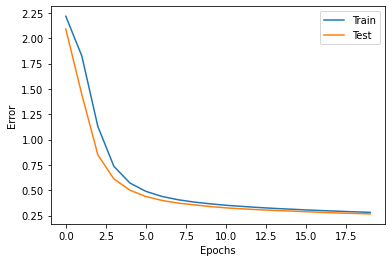

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(len(record_loss_train)), record_loss_train, label="Train")
plt.plot(range(len(record_loss_test)), record_loss_test, label="Test")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

### 正解率
モデルの性能を把握するため、テストデータ使い正解率を測定します。  

In [ ]:
correct = 0
total = 0
for i, (x, t) in enumerate(test_loader):
    x, t = x.cuda(), t.cuda()  # GPU対応
    x = x.view(-1, img_size*img_size)
    y = net(x)
    correct += (y.argmax(1) == t).sum().item()
    total += len(x)
print("正解率:", str(correct/total*100) + "%")

正解率: 92.29%


#4.11 GPT-n モデル



> RNNを用いないAttentionのみを使用したモデル
> あまりにも大きくなったデータ量の課題





> 1)
> 2)



#4.12 マルチタスク言語モデル

#4.13 音声処理


#4.14 深層強化学習のアルゴリズムの発展
